In [1]:
from tensorflow import keras # for building Neural Networks
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense # for creating regular densely-connected NN layer.

# Data manipulation
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

# Sklearn
import sklearn # for model evaluation
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics

# Other utilities
import sys
import os


In [2]:
df = pd.read_csv("../data/Fraud.csv")
# checking the data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.isnull().count()

step              6362620
type              6362620
amount            6362620
nameOrig          6362620
oldbalanceOrg     6362620
newbalanceOrig    6362620
nameDest          6362620
oldbalanceDest    6362620
newbalanceDest    6362620
isFraud           6362620
isFlaggedFraud    6362620
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
df.corr()["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

<AxesSubplot:>

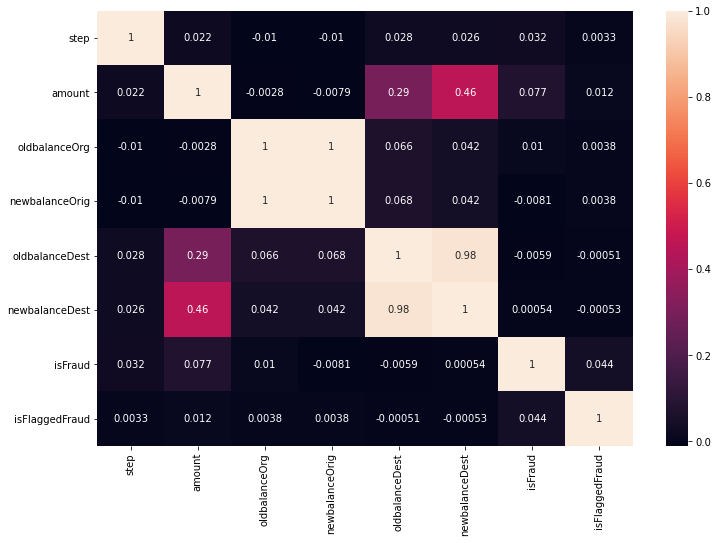

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [10]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

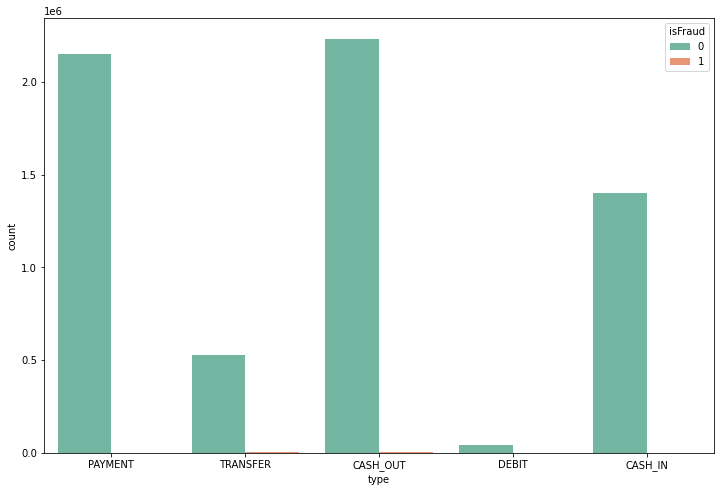

In [11]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 
# as we have non fraud transactions more than fraud transactions

In [12]:
zero_figures = df[df['isFraud'] == 0]
zero_figures.sample(frac=1).reset_index(drop=True)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,33,PAYMENT,953.09,C497987753,62134.00,61180.91,M69048225,0.00,0.00,0,0
1,42,PAYMENT,8748.19,C316741848,101486.23,92738.05,M1632421978,0.00,0.00,0,0
2,191,CASH_OUT,94494.44,C2058305084,0.00,0.00,C725747880,2124103.56,2588087.73,0,0
3,356,TRANSFER,399367.61,C510007156,0.00,0.00,C1042819052,3414039.96,3813407.57,0,0
4,182,PAYMENT,2243.20,C866513637,72300.00,70056.80,M199618750,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6354402,213,PAYMENT,4336.81,C299444034,49746.00,45409.19,M1480023983,0.00,0.00,0,0
6354403,691,CASH_OUT,53664.13,C1458689484,117.00,0.00,C463619676,0.00,53664.13,0,0
6354404,301,CASH_OUT,136934.82,C855064615,736.00,0.00,C957556215,610873.53,1106636.88,0,0
6354405,16,CASH_OUT,372886.86,C2041685411,1244.94,0.00,C1569736723,1152196.84,1525083.70,0,0


In [13]:
first_figures = df[df['isFraud'] == 1]

In [14]:
zero_figures = zero_figures.sample(10000)

In [15]:
df_reduced = pd.concat([zero_figures, first_figures], ignore_index=True)

In [16]:
df_reduced_shuffled = df_reduced.sample(frac=1).reset_index(drop=True)

In [17]:
df_reduced_shuffled

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,16,CASH_OUT,279168.30,C1082369034,82576.00,0.00,C1143616424,979.00,0.00,0,0
1,316,CASH_OUT,1340263.67,C147611805,1340263.67,0.00,C1596756534,371963.94,1712227.61,1,0
2,322,CASH_IN,136516.34,C1894964275,1750318.07,1886834.41,C1879817907,3273586.20,3137069.85,0,0
3,50,TRANSFER,112668.54,C994276793,112668.54,0.00,C670042954,0.00,0.00,1,0
4,734,TRANSFER,1810044.85,C1987403065,1810044.85,0.00,C846200321,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
18208,282,CASH_IN,213531.74,C1284306427,11190.00,224721.74,C1246437143,2157547.36,1944015.62,0,0
18209,300,CASH_OUT,402301.34,C1494455987,0.00,0.00,C341619291,3543829.37,3946130.71,0,0
18210,379,CASH_OUT,218419.93,C963097342,105262.00,0.00,C160504325,92382.92,310802.85,0,0
18211,513,TRANSFER,159724.42,C525368307,159724.42,0.00,C576603787,0.00,0.00,1,0


In [18]:
df_reduced_shuffled["isFraud"].value_counts(normalize=True)

0    0.549058
1    0.450942
Name: isFraud, dtype: float64

In [19]:
df_reduced_shuffled["type"].value_counts()

CASH_OUT    7592
TRANSFER    4912
PAYMENT     3387
CASH_IN     2239
DEBIT         83
Name: type, dtype: int64

In [20]:
df_reduced_shuffled["type"].value_counts(normalize=True)

CASH_OUT    0.416845
TRANSFER    0.269697
PAYMENT     0.185966
CASH_IN     0.122934
DEBIT       0.004557
Name: type, dtype: float64

<AxesSubplot:xlabel='type', ylabel='count'>

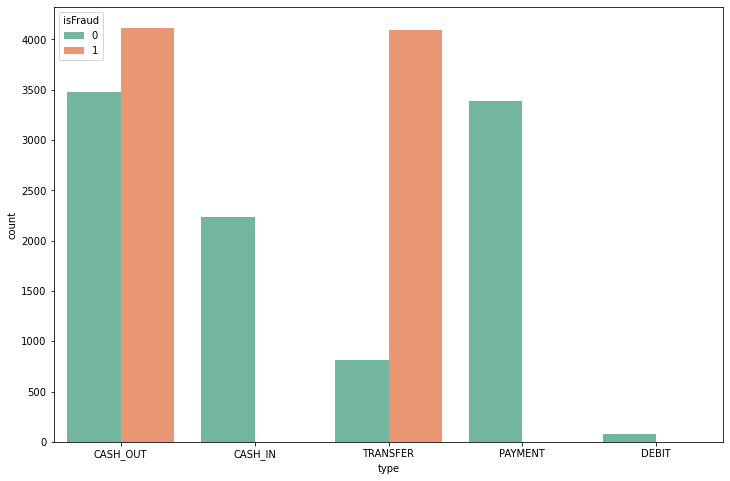

In [21]:
# counting the number of transactions per type
plt.figure(figsize=(12,8))
sns.countplot(x="type", data=df_reduced_shuffled,hue="isFraud" , palette="Set2")
# we are enable to analyse the Fraud transactions 
# as we have non fraud transactions more than fraud transactions

In [22]:
df_copy = df_reduced_shuffled.copy()
df_copy.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
df_copy.drop(["step", "nameOrig", "nameDest"], axis=1, inplace=True)

In [24]:
df_copy.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,CASH_OUT,279168.30,82576.00,0.00,979.00,0.00,0,0
1,CASH_OUT,1340263.67,1340263.67,0.00,371963.94,1712227.61,1,0
2,CASH_IN,136516.34,1750318.07,1886834.41,3273586.20,3137069.85,0,0
3,TRANSFER,112668.54,112668.54,0.00,0.00,0.00,1,0
4,TRANSFER,1810044.85,1810044.85,0.00,0.00,0.00,1,0


In [25]:
# Label Encoding the type variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_copy["type"] = le.fit_transform(df_copy["type"])

In [26]:
df_copy.drop(["isFlaggedFraud"], axis=1, inplace=True)

In [27]:
df_copy

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,279168.30,82576.00,0.00,979.00,0.00,0
1,1,1340263.67,1340263.67,0.00,371963.94,1712227.61,1
2,0,136516.34,1750318.07,1886834.41,3273586.20,3137069.85,0
3,4,112668.54,112668.54,0.00,0.00,0.00,1
4,4,1810044.85,1810044.85,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...
18208,0,213531.74,11190.00,224721.74,2157547.36,1944015.62,0
18209,1,402301.34,0.00,0.00,3543829.37,3946130.71,0
18210,1,218419.93,105262.00,0.00,92382.92,310802.85,0
18211,4,159724.42,159724.42,0.00,0.00,0.00,1


In [28]:
# choosing a model to use
# we will use Logistic Regression as we have unbalanced dataset
# First we need to create a training and test set
from sklearn.model_selection import train_test_split
X = df_copy.drop("isFraud",axis=1).values
y = df_copy["isFraud"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)

In [29]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential(name="Model-with-All-Features") # Model
model.add(Input(shape=(X_train.shape[1],), name='Input-Layer'))
model.add(Dense(8, activation='relu', name='Hidden-Layer'))
model.add(Dense(1, activation='sigmoid', name='Output-Layer'))

##### Step 4 - Compile keras model
model.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this Model's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your Model cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small models with a large Python overhead.
             )
history = model.fit(X_train, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided
          verbose=1, # default='auto', ('auto', 0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 'auto' defaults to 1 for most cases, but 2 when used with ParameterServerStrategy.
          validation_split=0.3, # default=0.0, Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 
          #validation_data=(X_test, y_test), # default=None, Data on which to evaluate the loss and any model metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.70}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.
          #validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          #max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          #workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          #use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
          callbacks=[callback, mc])


Epoch 1/100
893/893 [==============================] - 3s 2ms/step - loss: 8569.0527 - accuracy: 0.6662 - precision: 0.5812 - recall: 0.9560 - val_loss: 5132.6602 - val_accuracy: 0.6959 - val_precision: 0.6041 - val_recall: 0.9603

Epoch 00001: val_accuracy improved from -inf to 0.69595, saving model to best_model.h5
Epoch 2/100
893/893 [==============================] - 2s 2ms/step - loss: 1717.5328 - accuracy: 0.8158 - precision: 0.7189 - recall: 0.9779 - val_loss: 1144.6681 - val_accuracy: 0.8975 - val_precision: 0.8267 - val_recall: 0.9799

Epoch 00002: val_accuracy improved from 0.69595 to 0.89752, saving model to best_model.h5
Epoch 3/100
893/893 [==============================] - 2s 2ms/step - loss: 766.5155 - accuracy: 0.8935 - precision: 0.8192 - recall: 0.9833 - val_loss: 794.9410 - val_accuracy: 0.9027 - val_precision: 0.8478 - val_recall: 0.9580

Epoch 00003: val_accuracy improved from 0.89752 to 0.90275, saving model to best_model.h5
Epoch 4/100
893/893 [==================


Epoch 00028: val_accuracy improved from 0.92706 to 0.93124, saving model to best_model.h5
Epoch 29/100
893/893 [==============================] - 2s 2ms/step - loss: 375.7104 - accuracy: 0.8895 - precision: 0.8149 - recall: 0.9801 - val_loss: 618.5650 - val_accuracy: 0.9213 - val_precision: 0.8580 - val_recall: 0.9908

Epoch 00029: val_accuracy did not improve from 0.93124
Epoch 30/100
893/893 [==============================] - 2s 2ms/step - loss: 1045.3820 - accuracy: 0.8941 - precision: 0.8226 - recall: 0.9786 - val_loss: 9995.8184 - val_accuracy: 0.8073 - val_precision: 0.7047 - val_recall: 0.9914

Epoch 00030: val_accuracy did not improve from 0.93124
Epoch 31/100
893/893 [==============================] - 2s 2ms/step - loss: 1080.6853 - accuracy: 0.8822 - precision: 0.8037 - recall: 0.9811 - val_loss: 679.2004 - val_accuracy: 0.9148 - val_precision: 0.8598 - val_recall: 0.9707

Epoch 00031: val_accuracy did not improve from 0.93124
Epoch 32/100
893/893 [==========================


Epoch 00085: val_accuracy did not improve from 0.93359
Epoch 86/100
893/893 [==============================] - 2s 2ms/step - loss: 168.0685 - accuracy: 0.8853 - precision: 0.8092 - recall: 0.9788 - val_loss: 393.1126 - val_accuracy: 0.9250 - val_precision: 0.8833 - val_recall: 0.9620

Epoch 00086: val_accuracy did not improve from 0.93359
Epoch 87/100
893/893 [==============================] - 2s 2ms/step - loss: 338.2663 - accuracy: 0.8747 - precision: 0.7958 - recall: 0.9752 - val_loss: 684.7774 - val_accuracy: 0.8452 - val_precision: 0.7504 - val_recall: 0.9879

Epoch 00087: val_accuracy did not improve from 0.93359
Epoch 88/100
893/893 [==============================] - 2s 2ms/step - loss: 272.6097 - accuracy: 0.8789 - precision: 0.8056 - recall: 0.9675 - val_loss: 460.3906 - val_accuracy: 0.9197 - val_precision: 0.8590 - val_recall: 0.9850

Epoch 00088: val_accuracy did not improve from 0.93359
Epoch 89/100
893/893 [==============================] - 2s 2ms/step - loss: 854.9490 -

In [30]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr = (model.predict(X_train) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te = (model.predict(X_test) > 0.5).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")


-------------------- Model Summary --------------------
Model: "Model-with-All-Features"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer (Dense)         (None, 8)                 56        
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[ 2.19918817e-01  4.73483009e+01  5.24644508e+01 -5.23863487e+01
   8.34188461e-01  4.91996743e-02  3.13930931e+01 -5.52129707e+01]
 [-1.05819784e-01  1.03633296e+00  3.71409476e-01  1.87124833e-01
  -8.06600228e-02 -6.60335273e-02 -4.78636920e-01  6.69482291e-01]
 [-5.63532352e-01 -5.00248611e-01 -4.94111739e-02  3.76647294e-01
   4.19214033

decision trees, Naive Bayes or other classifiers

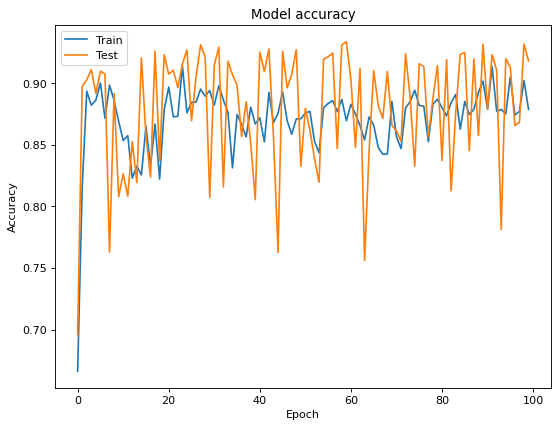

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

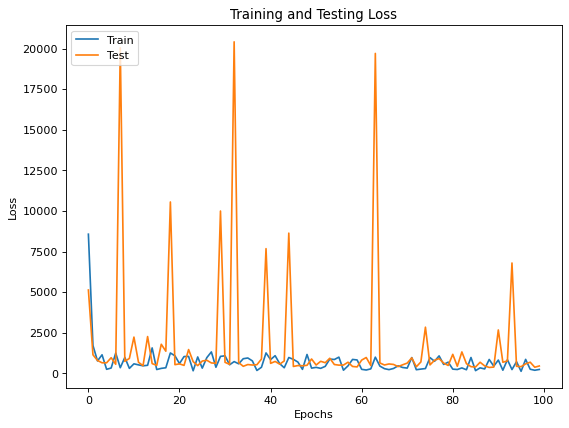

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [33]:
from sklearn import metrics
print("Baseline Feedforward Neural Networks Training:", metrics.accuracy_score(y_train, pred_labels_tr))
print("Baseline Feedforward Neural Networks Testing:", metrics.accuracy_score(y_test, pred_labels_te))

Baseline Feedforward Neural Networks Training: 0.9149737234292886
Baseline Feedforward Neural Networks Testing: 0.9062957540263543


In [34]:
from sklearn.metrics import mean_squared_error
print("Baseline Feedforward Neural Networks Training:", mean_squared_error(y_train, pred_labels_tr, squared=False))
print("Baseline Feedforward Neural Networks Testing:", mean_squared_error(y_test, pred_labels_te, squared=False))

Baseline Feedforward Neural Networks Training: 0.29159265520707384
Baseline Feedforward Neural Networks Testing: 0.3061114927173524


In [35]:
from sklearn.metrics import mean_absolute_error
print("Baseline Feedforward Neural Networks Training:", mean_absolute_error(y_train, pred_labels_tr))
print("Baseline Feedforward Neural Networks Testing:", mean_absolute_error(y_test, pred_labels_te))

Baseline Feedforward Neural Networks Training: 0.08502627657071143
Baseline Feedforward Neural Networks Testing: 0.09370424597364568


In [36]:
from sklearn.metrics import f1_score
print("Baseline Feedforward Neural Networks Training:", f1_score(y_train, pred_labels_tr))
print("Baseline Feedforward Neural Networks Testing:", f1_score(y_test, pred_labels_te))

Baseline Feedforward Neural Networks Training: 0.9134600031933577
Baseline Feedforward Neural Networks Testing: 0.9025875190258752


In [37]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(activation='relu', neurons=8, optimizer='adam'):
    # create model
    model = Sequential(name="Model-with-All-Features")
    model.add(Input(shape=(X_train.shape[1],), name='Input-Layer'))
    model.add(Dense(neurons, activation=activation, name='Hidden-Layer'))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer'))
    # Compile model
    model.compile(optimizer=optimizer, # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model2 during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model2 outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this model2's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your model2 cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small model2s with a large Python overhead.
             )
    return model

import numpy
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model,
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model2. An epoch is an iteration over the entire x and y data provided          
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model2 will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model2 metrics on this data at the end of each epoch. 
          #validation_data=(X_test_scaled, y_test), # default=None, Data on which to evaluate the loss and any model2 metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.70}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model2 to "pay more attention" to samples from an under-represented class.
          #validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          #max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          #workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          #use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
            )


model._estimator_type = "classifier"
trained = model.fit(X_train,y_train)

Epoch 1/100
1020/1020 [==============================] - 3s 2ms/step - loss: 20608.9355 - accuracy: 0.7684 - precision: 0.6822 - recall: 0.9152 - val_loss: 4972.2031 - val_accuracy: 0.7690 - val_precision: 0.6747 - val_recall: 0.9696
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/step - loss: 1687.4526 - accuracy: 0.8590 - precision: 0.7741 - recall: 0.9725 - val_loss: 33570.8359 - val_accuracy: 0.7620 - val_precision: 0.6622 - val_recall: 0.9941
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/step - loss: 2627.4280 - accuracy: 0.8874 - precision: 0.8112 - recall: 0.9794 - val_loss: 2474.6982 - val_accuracy: 0.9020 - val_precision: 0.8306 - val_recall: 0.9907
Epoch 4/100
1020/1020 [==============================] - 2s 2ms/step - loss: 2169.9011 - accuracy: 0.8947 - precision: 0.8237 - recall: 0.9766 - val_loss: 2100.1155 - val_accuracy: 0.9039 - val_precision: 0.8500 - val_recall: 0.9628
Epoch 5/100
1020/1020 [==============================] - 2s 2ms/st

1020/1020 [==============================] - 2s 2ms/step - loss: 828.1606 - accuracy: 0.8891 - precision: 0.8172 - recall: 0.9727 - val_loss: 1468.7999 - val_accuracy: 0.8878 - val_precision: 0.8910 - val_recall: 0.8639
Epoch 72/100
1020/1020 [==============================] - 2s 2ms/step - loss: 820.7737 - accuracy: 0.8927 - precision: 0.8264 - recall: 0.9662 - val_loss: 452.7049 - val_accuracy: 0.9086 - val_precision: 0.8620 - val_recall: 0.9560
Epoch 73/100
1020/1020 [==============================] - 2s 2ms/step - loss: 711.5140 - accuracy: 0.8874 - precision: 0.8169 - recall: 0.9686 - val_loss: 1333.3906 - val_accuracy: 0.8804 - val_precision: 0.8079 - val_recall: 0.9738
Epoch 74/100
1020/1020 [==============================] - 2s 2ms/step - loss: 659.0287 - accuracy: 0.8941 - precision: 0.8271 - recall: 0.9688 - val_loss: 630.7040 - val_accuracy: 0.9110 - val_precision: 0.8469 - val_recall: 0.9865
Epoch 75/100
1020/1020 [==============================] - 2s 2ms/step - loss: 239.5

In [38]:
predictions = trained.model.predict(X_test, verbose=1)

171/171 [==============================] - 0s 809us/step


C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


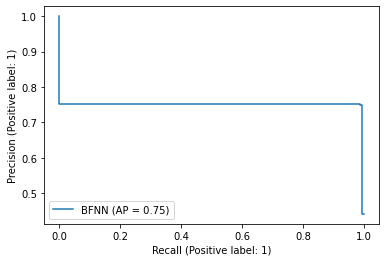

In [39]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model, X_test, y_test, name = 'BFNN')

### TryOuts with Other Algorithms Baselines - Decision Trees

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [41]:
dc = DecisionTreeClassifier(max_depth =3, random_state = 42)
gnb = GaussianNB()
rfc = RandomForestClassifier()

In [42]:
dc.fit(X_train, y_train)
gnb.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
from sklearn import metrics
test_pred_decision_tree = dc.predict(X_test)
test_pred_gnb = gnb.predict(X_test)
test_pred_rfc = rfc.predict(X_test)
train_pred_decision_tree = dc.predict(X_train)
train_pred_gnb = gnb.predict(X_train)
train_pred_rfc = rfc.predict(X_train)
print("Decision Trees Classifier model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_decision_tree)*100)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_gnb)*100)
print("Random Forest Classifier model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_rfc)*100)
print('Training Set')
print("Decision Trees Classifier model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_decision_tree)*100)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_gnb)*100)
print("Random Forest Classifier model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_rfc)*100)

Decision Trees Classifier model accuracy(in %): 94.60102489019033
Gaussian Naive Bayes model accuracy(in %): 67.40483162518302
Random Forest Classifier model accuracy(in %): 99.24963396778917
Training Set
Decision Trees Classifier model accuracy(in %): 94.27406071064397
Gaussian Naive Bayes model accuracy(in %): 66.42089575652992
Random Forest Classifier model accuracy(in %): 100.0


C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2.

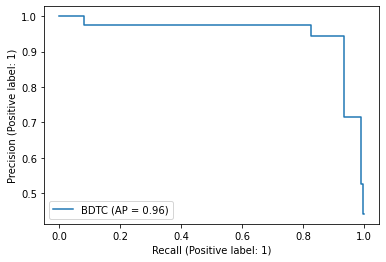

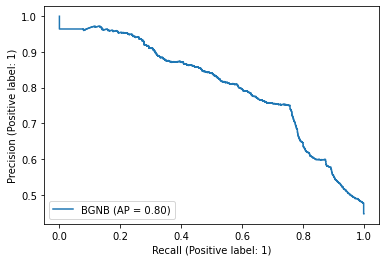

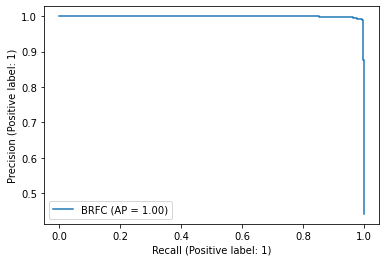

In [44]:
from sklearn.metrics import plot_precision_recall_curve
# Use sklearn to plot precision-recall curves
plot_precision_recall_curve(dc, X_test, y_test, name = 'BDTC')
plot_precision_recall_curve(gnb, X_test, y_test, name = 'BGNB')
plot_precision_recall_curve(rfc, X_test, y_test, name = 'BRFC')

In [45]:
from sklearn.metrics import f1_score
print('F1 Scores')
print('Decision Trees Classifier', f1_score(y_train, train_pred_decision_tree))
print('Naive Bayes Classifier', f1_score(y_train, train_pred_gnb))
print('Random Forest Classifier', f1_score(y_train, train_pred_rfc))
print("Testing Phase")
print('Decision Trees Classifier', f1_score(y_test, test_pred_decision_tree))
print('Naive Bayes Classifier', f1_score(y_test, test_pred_gnb))
print('Random Forest Classifier', f1_score(y_test, test_pred_rfc))

F1 Scores
Decision Trees Classifier 0.9364111498257839
Naive Bayes Classifier 0.4398796284181604
Random Forest Classifier 1.0
Testing Phase
Decision Trees Classifier 0.938503231186158
Naive Bayes Classifier 0.4372827804107425
Random Forest Classifier 0.9915411594800908


In [46]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error')
print('Decision Trees Classifier', mean_squared_error(y_train, train_pred_decision_tree, squared=False))
print('Naive Bayes Classifier', mean_squared_error(y_train, train_pred_gnb, squared=False))
print('Random Forest Classifier', mean_squared_error(y_train, train_pred_rfc, squared=False))
print("Testing Phase")
print('Decision Trees Classifier', mean_squared_error(y_test, test_pred_decision_tree, squared=False))
print('Naive Bayes Classifier', mean_squared_error(y_test, test_pred_gnb, squared=False))
print('Random Forest Classifier', mean_squared_error(y_test, test_pred_rfc, squared=False))

Root Mean Squared Error
Decision Trees Classifier 0.23928934972865024
Naive Bayes Classifier 0.5794747987917169
Random Forest Classifier 0.0
Testing Phase
Decision Trees Classifier 0.2323569476002313
Naive Bayes Classifier 0.5709217842648587
Random Forest Classifier 0.0866236706801804


In [47]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error')
print('Decision Trees Classifier', mean_absolute_error(y_train, train_pred_decision_tree))
print('Naive Bayes Classifier', mean_absolute_error(y_train, train_pred_gnb))
print('Random Forest Classifier', mean_absolute_error(y_train, train_pred_rfc))
print('Testing Phase')
print('Decision Trees Classifier', mean_absolute_error(y_test, test_pred_decision_tree))
print('Naive Bayes Classifier', mean_absolute_error(y_test, test_pred_gnb))
print('Random Forest Classifier', mean_absolute_error(y_test, test_pred_rfc))

Mean Absolute Error
Decision Trees Classifier 0.05725939289356028
Naive Bayes Classifier 0.33579104243470076
Random Forest Classifier 0.0
Testing Phase
Decision Trees Classifier 0.05398975109809663
Naive Bayes Classifier 0.32595168374816985
Random Forest Classifier 0.007503660322108346


## FFN with scaled feature set II

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [49]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential(name="model2-with-All-Features") # model2
model2.add(Input(shape=(X_train_scaled.shape[1],), name='Input-Layer'))
model2.add(Dense(8, activation='relu', name='Hidden-Layer'))
model2.add(Dense(1, activation='sigmoid', name='Output-Layer'))

##### Step 4 - Compile keras model2
model2.compile(optimizer='adam', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model2 during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model2 outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this model2's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your model2 cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small model2s with a large Python overhead.
             )
history2 = model2.fit(X_train_scaled, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model2. An epoch is an iteration over the entire x and y data provided
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model2 will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model2 metrics on this data at the end of each epoch. 
          #validation_data=(X_test_scaled, y_test), # default=None, Data on which to evaluate the loss and any model2 metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model2 to "pay more attention" to samples from an under-represented class.
          #validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          #max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          #workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          #use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
          callbacks=[callback, mc])


Epoch 1/100
1020/1020 [==============================] - 3s 2ms/step - loss: 0.2556 - accuracy: 0.5207 - precision: 0.4856 - recall: 0.9766 - val_loss: 0.5358 - val_accuracy: 0.5847 - val_precision: 0.5293 - val_recall: 0.9459

Epoch 00001: val_accuracy improved from -inf to 0.58471, saving model to best_model.h5
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.2029 - accuracy: 0.7641 - precision: 0.6828 - recall: 0.8950 - val_loss: 0.4683 - val_accuracy: 0.7804 - val_precision: 0.6963 - val_recall: 0.9341

Epoch 00002: val_accuracy improved from 0.58471 to 0.78039, saving model to best_model.h5
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1775 - accuracy: 0.7985 - precision: 0.7284 - recall: 0.8853 - val_loss: 0.4056 - val_accuracy: 0.8396 - val_precision: 0.8067 - val_recall: 0.8605

Epoch 00003: val_accuracy improved from 0.78039 to 0.83961, saving model to best_model.h5
Epoch 4/100
1020/1020 [==========================


Epoch 00055: val_accuracy did not improve from 0.96392
Epoch 56/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0543 - accuracy: 0.9536 - precision: 0.9159 - recall: 0.9883 - val_loss: 0.1389 - val_accuracy: 0.9584 - val_precision: 0.9237 - val_recall: 0.9924

Epoch 00056: val_accuracy did not improve from 0.96392
Epoch 57/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0535 - accuracy: 0.9541 - precision: 0.9160 - recall: 0.9894 - val_loss: 0.1402 - val_accuracy: 0.9569 - val_precision: 0.9221 - val_recall: 0.9907

Epoch 00057: val_accuracy did not improve from 0.96392
Epoch 58/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0531 - accuracy: 0.9556 - precision: 0.9185 - recall: 0.9898 - val_loss: 0.1297 - val_accuracy: 0.9690 - val_precision: 0.9495 - val_recall: 0.9856

Epoch 00058: val_accuracy improved from 0.96392 to 0.96902, saving model to best_model.h5
Epoch 59/100
1020/1020 [==============================] -

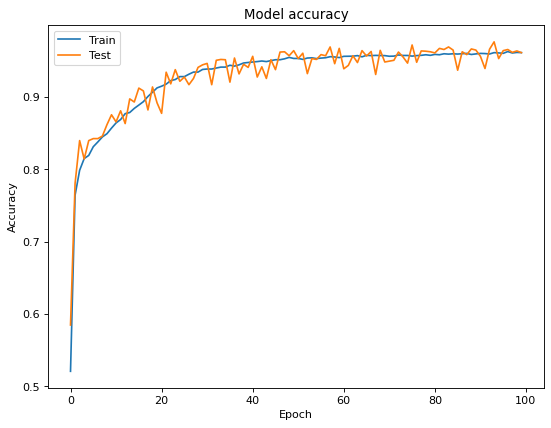

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
##### Step 6 - Use model to make predictions
# Predict class labels on training data
pred_labels_tr2 = (model2.predict(X_train_scaled) > 0.5).astype(int)
# Predict class labels on a test data
pred_labels_te2 = (model2.predict(X_test_scaled) > 0.5).astype(int)


##### Step 7 - Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model2.summary() # print model summary
print("")
print('-------------------- Weights and Biases --------------------')
for layer in model2.layers:
    print("Layer: ", layer.name) # print layer name
    print("  --Kernels (Weights): ", layer.get_weights()[0]) # weights
    print("  --Biases: ", layer.get_weights()[1]) # biases
    
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr2))
print("")

print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te2))
print("")


-------------------- Model Summary --------------------
Model: "model2-with-All-Features"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-Layer (Dense)         (None, 8)                 56        
_________________________________________________________________
Output-Layer (Dense)         (None, 1)                 9         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________

-------------------- Weights and Biases --------------------
Layer:  Hidden-Layer
  --Kernels (Weights):  [[-2.5574249e-01 -7.9770398e-01 -4.6435145e-01  8.3559364e-01
  -6.3521773e-01  1.0374143e+00 -7.4784052e-01 -1.6367296e-02]
 [-1.3678254e+00 -5.1840294e-02  3.2846555e-01 -2.5341172e+00
  -1.8120883e+00  8.2712106e-02 -1.2681491e+00 -1.5264560e+00]
 [ 3.0807400e+00 -2.6525409e+00 -4.6590338e+00  9.7183406e-01
   3.2980280e+00  2.3280921e+00 

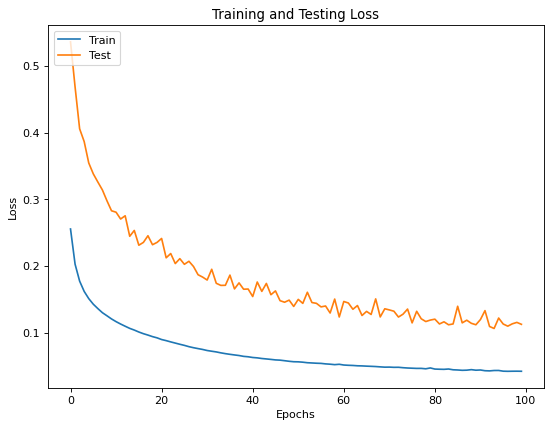

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
from sklearn import metrics
print("Baseline Feedforward Neural Networks Training:", metrics.accuracy_score(y_train, pred_labels_tr2))
print("Baseline Feedforward Neural Networks Testing:", metrics.accuracy_score(y_test, pred_labels_te2))

Baseline Feedforward Neural Networks Training: 0.961016550317672
Baseline Feedforward Neural Networks Testing: 0.9606515373352855


In [54]:
from sklearn.metrics import mean_squared_error
print("Baseline Feedforward Neural Networks Training:", mean_squared_error(y_train, pred_labels_tr2, squared=False))
print("Baseline Feedforward Neural Networks Testing:", mean_squared_error(y_test, pred_labels_te2, squared=False))

Baseline Feedforward Neural Networks Training: 0.1974422692392083
Baseline Feedforward Neural Networks Testing: 0.1983644692597807


In [55]:
from sklearn.metrics import mean_absolute_error
print("Baseline Feedforward Neural Networks Training:", mean_absolute_error(y_train, pred_labels_tr2))
print("Baseline Feedforward Neural Networks Testing:", mean_absolute_error(y_test, pred_labels_te2))

Baseline Feedforward Neural Networks Training: 0.038983449682328024
Baseline Feedforward Neural Networks Testing: 0.03934846266471449


In [56]:
from sklearn.metrics import f1_score
print("Baseline Feedforward Neural Networks Training:", f1_score(y_train, pred_labels_tr2))
print("Baseline Feedforward Neural Networks Testing:", f1_score(y_test, pred_labels_te2))

Baseline Feedforward Neural Networks Training: 0.9587654525844188
Baseline Feedforward Neural Networks Testing: 0.9571627814305638


In [57]:
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(activation='relu', neurons=8, optimizer='adam'):
    # create model
    model = Sequential(name="Model-with-All-Features")
    model.add(Input(shape=(X_train_scaled.shape[1],), name='Input-Layer'))
    model.add(Dense(neurons, activation=activation, name='Hidden-Layer'))
    model.add(Dense(1, activation='sigmoid', name='Output-Layer'))
    # Compile model
    model.compile(optimizer=optimizer, # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'Precision', 'Recall'], # List of metrics to be evaluated by the model2 during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance. 
              loss_weights=None, # default=None, Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model2 outputs.
              weighted_metrics=None, # default=None, List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.
              run_eagerly=None, # Defaults to False. If True, this model2's logic will not be wrapped in a tf.function. Recommended to leave this as None unless your model2 cannot be run inside a tf.function.
              steps_per_execution=None # Defaults to 1. The number of batches to run during each tf.function call. Running multiple batches inside a single tf.function call can greatly improve performance on TPUs or small model2s with a large Python overhead.
             )
    return model

import numpy
from sklearn.model_selection import GridSearchCV
model_classify = KerasClassifier(build_fn=create_model,
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model2. An epoch is an iteration over the entire x and y data provided          
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model2 will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model2 metrics on this data at the end of each epoch. 
          #validation_data=(X_test_scaled, y_test), # default=None, Data on which to evaluate the loss and any model2 metrics at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          #class_weight={0 : 0.01, 1 : 0.99}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model2 to "pay more attention" to samples from an under-represented class.
          #validation_freq=3, # default=1, Only relevant if validation data is provided. If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs.
          #max_queue_size=10, # default=10, Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.
          #workers=1, # default=1, Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1.
          #use_multiprocessing=False, # default=False, Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. 
            )


model_classify._estimator_type = "classifier"
trained = model_classify.fit(X_train_scaled,y_train)

Epoch 1/100
1020/1020 [==============================] - 3s 2ms/step - loss: 0.5767 - accuracy: 0.7261 - precision: 0.7228 - recall: 0.6416 - val_loss: 0.5142 - val_accuracy: 0.7820 - val_precision: 0.8782 - val_recall: 0.6154
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4763 - accuracy: 0.8152 - precision: 0.8890 - recall: 0.6764 - val_loss: 0.4393 - val_accuracy: 0.8412 - val_precision: 0.9183 - val_recall: 0.7219
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.4097 - accuracy: 0.8525 - precision: 0.9204 - recall: 0.7383 - val_loss: 0.3819 - val_accuracy: 0.8608 - val_precision: 0.9331 - val_recall: 0.7540
Epoch 4/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.3512 - accuracy: 0.8715 - precision: 0.9339 - recall: 0.7708 - val_loss: 0.3323 - val_accuracy: 0.8784 - val_precision: 0.9440 - val_recall: 0.7844
Epoch 5/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.3062 - accura

Epoch 37/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1280 - accuracy: 0.9513 - precision: 0.9695 - recall: 0.9214 - val_loss: 0.1391 - val_accuracy: 0.9588 - val_precision: 0.9736 - val_recall: 0.9366
Epoch 38/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1267 - accuracy: 0.9532 - precision: 0.9669 - recall: 0.9286 - val_loss: 0.1376 - val_accuracy: 0.9486 - val_precision: 0.9808 - val_recall: 0.9070
Epoch 39/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1255 - accuracy: 0.9536 - precision: 0.9694 - recall: 0.9268 - val_loss: 0.1358 - val_accuracy: 0.9588 - val_precision: 0.9770 - val_recall: 0.9332
Epoch 40/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1244 - accuracy: 0.9558 - precision: 0.9687 - recall: 0.9325 - val_loss: 0.1376 - val_accuracy: 0.9525 - val_precision: 0.9767 - val_recall: 0.9197
Epoch 41/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1236 - a

Epoch 73/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1021 - accuracy: 0.9712 - precision: 0.9652 - recall: 0.9714 - val_loss: 0.1138 - val_accuracy: 0.9725 - val_precision: 0.9558 - val_recall: 0.9865
Epoch 74/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1015 - accuracy: 0.9691 - precision: 0.9642 - recall: 0.9677 - val_loss: 0.1170 - val_accuracy: 0.9663 - val_precision: 0.9377 - val_recall: 0.9932
Epoch 75/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1009 - accuracy: 0.9702 - precision: 0.9645 - recall: 0.9699 - val_loss: 0.1120 - val_accuracy: 0.9714 - val_precision: 0.9688 - val_recall: 0.9696
Epoch 76/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1003 - accuracy: 0.9703 - precision: 0.9643 - recall: 0.9703 - val_loss: 0.1115 - val_accuracy: 0.9773 - val_precision: 0.9607 - val_recall: 0.9915
Epoch 77/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0999 - a

In [58]:
predictions = trained.model.predict(X_test_scaled, verbose=1)

171/171 [==============================] - 0s 844us/step


C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


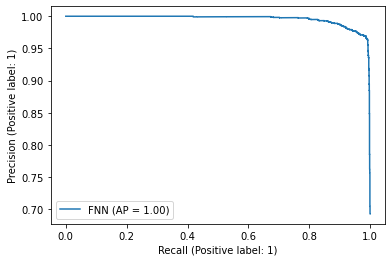

In [59]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(model_classify, X_test_scaled, y_test, name = 'FNN')

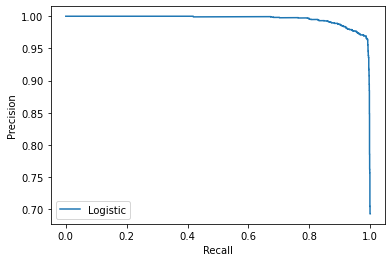

In [60]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predictions)
plt.plot(lr_recall, lr_precision, label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### TryOuts with Other Algorithms - Decision Trees

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [62]:
dc = DecisionTreeClassifier(max_depth =3, random_state = 42)
gnb = GaussianNB()
rfc = RandomForestClassifier()

In [63]:
dc.fit(X_train_scaled, y_train)
gnb.fit(X_train_scaled, y_train)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [64]:
from sklearn import metrics
train_pred_decision_tree = dc.predict(X_train_scaled)
train_pred_gnb = gnb.predict(X_train_scaled)
train_pred_rfc = rfc.predict(X_train_scaled)

test_pred_decision_tree = dc.predict(X_test_scaled)
test_pred_gnb = gnb.predict(X_test_scaled)
test_pred_rfc = rfc.predict(X_test_scaled)
print("Decision Trees Classifier model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_decision_tree))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_gnb))
print("Random Forest Classifier model accuracy(in %):", metrics.accuracy_score(y_train, train_pred_rfc))
print("Testing Phase")
print("Decision Trees Classifier model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_decision_tree))
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_gnb))
print("Random Forest Classifier model accuracy(in %):", metrics.accuracy_score(y_test, test_pred_rfc))

Decision Trees Classifier model accuracy(in %): 0.9427406071064397
Gaussian Naive Bayes model accuracy(in %): 0.6724448976390305
Random Forest Classifier model accuracy(in %): 1.0
Testing Phase
Decision Trees Classifier model accuracy(in %): 0.9460102489019033
Gaussian Naive Bayes model accuracy(in %): 0.6835651537335286
Random Forest Classifier model accuracy(in %): 0.9928623718887262


C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dee\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2.

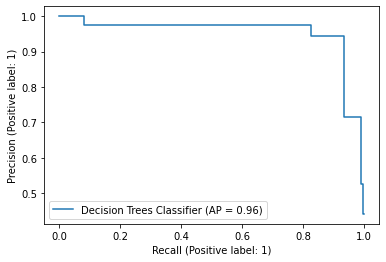

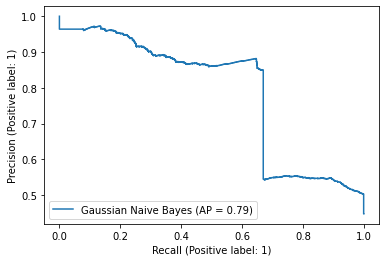

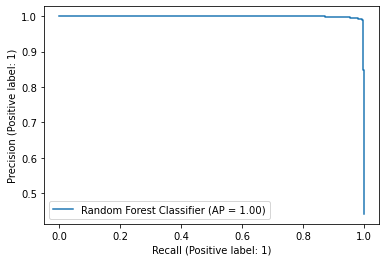

In [65]:
from sklearn.metrics import plot_precision_recall_curve
# Use sklearn to plot precision-recall curves
plot_precision_recall_curve(dc, X_test_scaled, y_test, name = 'Decision Trees Classifier')
plot_precision_recall_curve(gnb, X_test_scaled, y_test, name = 'Gaussian Naive Bayes')
plot_precision_recall_curve(rfc, X_test_scaled, y_test, name = 'Random Forest Classifier')

In [66]:
from sklearn.metrics import f1_score
print('F1 Scores')
print('Decision Trees Classifier', f1_score(y_train, train_pred_decision_tree))
print('Naive Bayes Classifier', f1_score(y_train, train_pred_gnb))
print('Random Forest Classifier', f1_score(y_train, train_pred_rfc))
print('Testing Phase')
print('Decision Trees Classifier', f1_score(y_test, test_pred_decision_tree))
print('Naive Bayes Classifier', f1_score(y_test, test_pred_gnb))
print('Random Forest Classifier', f1_score(y_test, test_pred_rfc))

F1 Scores
Decision Trees Classifier 0.9364111498257839
Naive Bayes Classifier 0.46870229007633585
Random Forest Classifier 1.0
Testing Phase
Decision Trees Classifier 0.938503231186158
Naive Bayes Classifier 0.47334754797441364
Random Forest Classifier 0.9919504643962848


In [67]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error')
print('Decision Trees Classifier', mean_squared_error(y_train, train_pred_decision_tree, squared=False))
print('Naive Bayes Classifier', mean_squared_error(y_train, train_pred_gnb, squared=False))
print('Random Forest Classifier', mean_squared_error(y_train, train_pred_rfc, squared=False))
print("Testing Phase")
print('Decision Trees Classifier', mean_squared_error(y_test, test_pred_decision_tree, squared=False))
print('Naive Bayes Classifier', mean_squared_error(y_test, test_pred_gnb, squared=False))
print('Random Forest Classifier', mean_squared_error(y_test, test_pred_rfc, squared=False))

Root Mean Squared Error
Decision Trees Classifier 0.23928934972865024
Naive Bayes Classifier 0.5723242982444214
Random Forest Classifier 0.0
Testing Phase
Decision Trees Classifier 0.2323569476002313
Naive Bayes Classifier 0.5625254183292266
Random Forest Classifier 0.08448448444107233


In [68]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error')
print('Decision Trees Classifier', mean_absolute_error(y_train, train_pred_decision_tree))
print('Naive Bayes Classifier', mean_absolute_error(y_train, train_pred_gnb))
print('Random Forest Classifier', mean_absolute_error(y_train, train_pred_rfc))
print("Testing Phase")
print('Decision Trees Classifier', mean_absolute_error(y_test, test_pred_decision_tree))
print('Naive Bayes Classifier', mean_absolute_error(y_test, test_pred_gnb))
print('Random Forest Classifier', mean_absolute_error(y_test, test_pred_rfc))

Mean Absolute Error
Decision Trees Classifier 0.05725939289356028
Naive Bayes Classifier 0.32755510236096946
Random Forest Classifier 0.0
Testing Phase
Decision Trees Classifier 0.05398975109809663
Naive Bayes Classifier 0.31643484626647145
Random Forest Classifier 0.007137628111273792


### GridSearch Parameter Optimization

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled  = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [70]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model_grid.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model3 = Sequential(name="model3-with-All-Features") # model3
model3.add(Input(shape=(X_train_scaled.shape[1],), name='Input-Layer'))
model3.add(Dense(20, activation='relu', name='Hidden-Layer'))
model3.add(Dense(1, activation='sigmoid', name='Output-Layer'))

##### Step 4 - Compile keras model3
model3.compile(optimizer='RMSprop', # default='rmsprop', an algorithm to be used in backpropagation
              loss='binary_crossentropy', # Loss function to be optimized. A string (name of loss function), or a tf.keras.losses.Loss instance.
              metrics=['accuracy', 'mse', 'Precision', 'Recall'], # List of metrics to be evaluated by the model3 during training and testing. Each of this can be a string (name of a built-in function), function or a tf.keras.metrics.Metric instance.         
             )
history3 = model3.fit(X_train_scaled, # input data
          y_train, # target data
          batch_size=10, # Number of samples per gradient update. If unspecified, batch_size will default to 32.
          epochs=100, # default=1, Number of epochs to train the model3. An epoch is an iteration over the entire x and y data provided
          validation_split=0.2, # default=0.0, Fraction of the training data to be used as validation data. The model3 will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model3 metrics on this data at the end of each epoch. 
          shuffle=True, # default=True, Boolean (whether to shuffle the training data before each epoch) or str (for 'batch').
          class_weight={0 : 0.3, 1 : 0.7}, # default=None, Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model3 to "pay more attention" to samples from an under-represented class.        
          callbacks=[callback, mc])


Epoch 1/100
1020/1020 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.5465 - mse: 0.2082 - precision: 0.4997 - recall: 0.9539 - val_loss: 0.5256 - val_accuracy: 0.7424 - val_mse: 0.1748 - val_precision: 0.6529 - val_recall: 0.9493

Epoch 00001: val_accuracy improved from -inf to 0.74235, saving model to best_model_grid.h5
Epoch 2/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.2025 - accuracy: 0.7996 - mse: 0.1604 - precision: 0.7150 - recall: 0.9273 - val_loss: 0.4495 - val_accuracy: 0.8216 - val_mse: 0.1419 - val_precision: 0.7567 - val_recall: 0.9070

Epoch 00002: val_accuracy improved from 0.74235 to 0.82157, saving model to best_model_grid.h5
Epoch 3/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.1747 - accuracy: 0.8273 - mse: 0.1316 - precision: 0.7575 - recall: 0.9102 - val_loss: 0.3823 - val_accuracy: 0.8412 - val_mse: 0.1174 - val_precision: 0.7886 - val_recall: 0.8986

Epoch 00003: val_accuracy improve


Epoch 00050: val_accuracy improved from 0.95804 to 0.95922, saving model to best_model_grid.h5
Epoch 51/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0674 - accuracy: 0.9517 - mse: 0.0369 - precision: 0.9149 - recall: 0.9848 - val_loss: 0.1492 - val_accuracy: 0.9498 - val_mse: 0.0398 - val_precision: 0.9073 - val_recall: 0.9932

Epoch 00051: val_accuracy did not improve from 0.95922
Epoch 52/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0677 - accuracy: 0.9522 - mse: 0.0362 - precision: 0.9155 - recall: 0.9853 - val_loss: 0.1507 - val_accuracy: 0.9443 - val_mse: 0.0408 - val_precision: 0.8964 - val_recall: 0.9949

Epoch 00052: val_accuracy did not improve from 0.95922
Epoch 53/100
1020/1020 [==============================] - 2s 2ms/step - loss: 0.0673 - accuracy: 0.9528 - mse: 0.0362 - precision: 0.9155 - recall: 0.9870 - val_loss: 0.1347 - val_accuracy: 0.9627 - val_mse: 0.0339 - val_precision: 0.9444 - val_recall: 0.9772

Epoch 00053

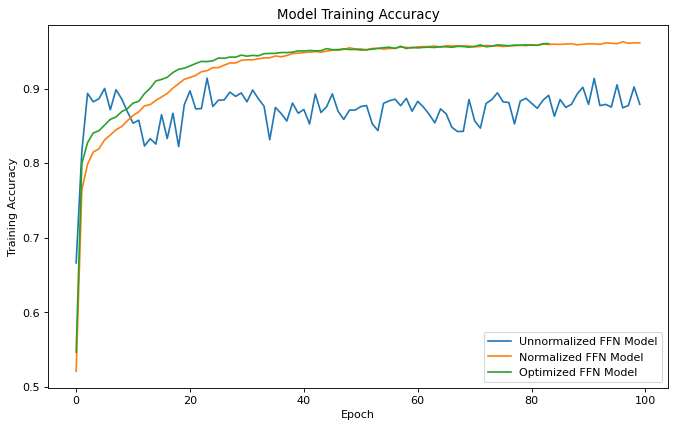

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.title('Model Training Accuracy')
plt.ylabel('Training Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unnormalized FFN Model', 'Normalized FFN Model', 'Optimized FFN Model'], loc='lower right')
plt.show()

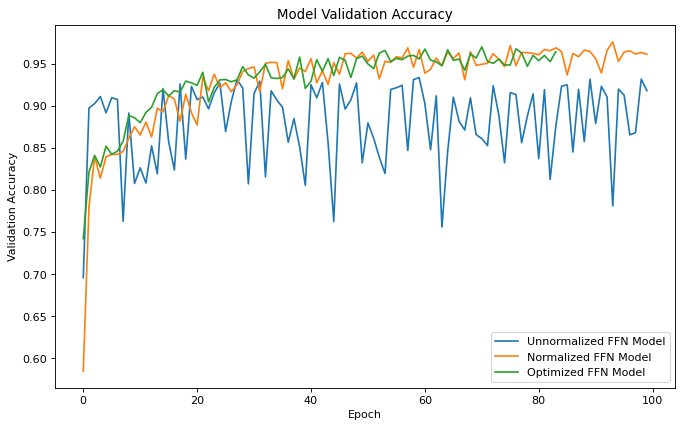

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Unnormalized FFN Model', 'Normalized FFN Model', 'Optimized FFN Model'], loc='lower right')
plt.show()

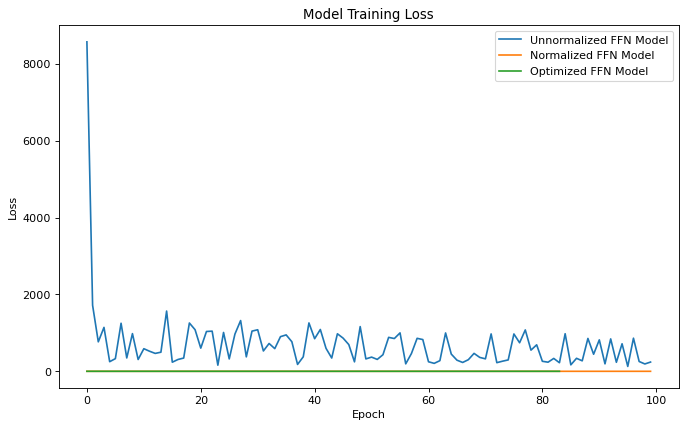

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Unnormalized FFN Model', 'Normalized FFN Model', 'Optimized FFN Model'], loc='upper right')
plt.show()

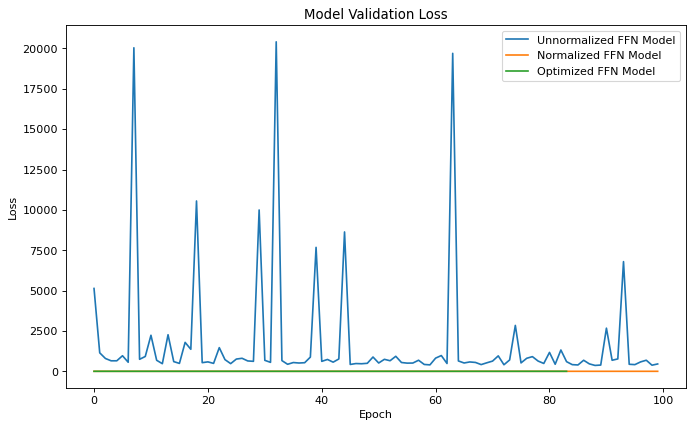

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Unnormalized FFN Model', 'Normalized FFN Model', 'Optimized FFN Model'], loc='upper right')
plt.show()

## Accuracy Across Predictions

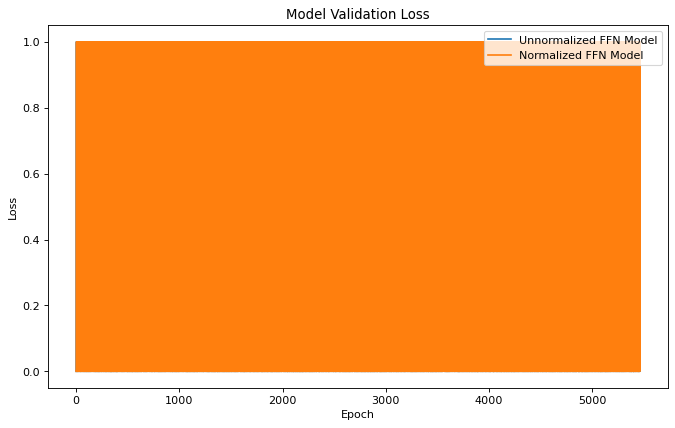

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(pred_labels_te2)
plt.plot(y_test)
plt.title('Model Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Unnormalized FFN Model', 'Normalized FFN Model', 'Optimized FFN Model'], loc='upper right')
plt.show()